In [1]:
import os
from QCM import *

## Precursory Information
* The scripts assume that there is exactly one header line of the form "XTC/3 Data Log 7/9/2025 3:35:18 PM."  This is the default header created by the XTC reader.  This requires that you do not stop and then restart recording in XTC without moving to a new filename.
* The parser requires that the output from XTC includes the following items: *Timestamp, Rate, Thickness, State Time, Raw Frequency*
* The ```load_QCM(path, bins=5)``` command loads data from a single file.  The command averages measurements by binning the data.  It defaults to 5 second bin widths.
* The ```process_directory(path)``` command will parse an entire directory by searching for filenames containing the string 'QCM' and ending in '.txt'.
* Requires Python libraries *pymc, pandas, and numpy*

## Single file usage example

Text(0, 0.5, 'Film Thickness [kAng]')

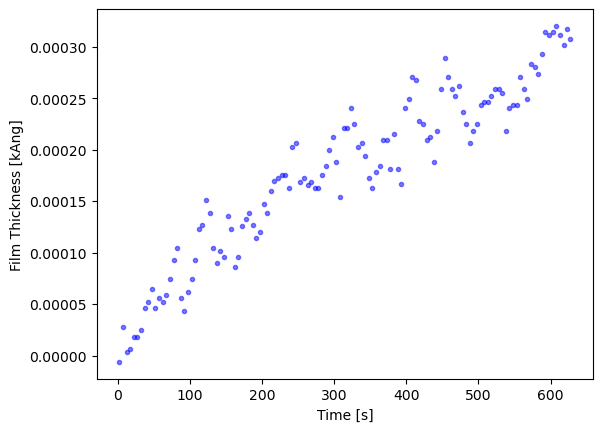

In [26]:
# Filepath to a target QCM file
path = '/Users/braden/Documents/ProbeTools/Testbed/Random QCM File Name.txt'

# Load the data out of the file (and convert frequencies to thicknesses)
times, freqs, thics = load_QCM(path, bins=5)

# Plot the data
plt.plot(times, thics, 'b.', alpha=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Film Thickness [kAng]')

In [6]:
# Fit a line to the data.  
# Note that slope is a fit to the data, so has units of kAng/s
slope, y_int, ci_95 = bayesian_linreg_mcmc(times, thics)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma, nu]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 8 seconds.


Mean slope: 4.206e-07 ± 1.3e-08
Mean intercept: 4.598e-05 ± 4.9e-06


In [27]:
# Convert the slope in [kAng/s] to [um/kHr] (the thin-film deposition unit of convention, despite being a stupid unit)
rate = um_kHr(slope)
print(f'        Deposition rate: {rate:.4e} um/kHr')
print(f'95% confidence interval: {um_kHr(ci_95[0]):.4e} to {um_kHr(ci_95[1]):.4e} um/kHr')


        Deposition rate: 1.5142e-01 um/kHr
95% confidence interval: 1.4216e-01 to 1.6064e-01 um/kHr


## Simple parsing of an entire directory

For the simple case of fitting a line to the full set of data from every QCM log in a directory, go ahead and use the single command ```process_directory(dir_path)```.  The code will automatically identify all files containing the string 'QCM' and ending with '.txt', parse them, fit a line to them (using both Bayesian inference and the RANSAC algorithm) and then save the outputs to a database called "QCM Database.csv".  It will also generate images of the fit lines inside the target directory in a folder called "Figures".  You'll find images for both the RANSAC fits and the Bayesian fits.

In [2]:
dir_path = '/Users/braden/Documents/ProbeTools/Testbed'
process_directory(dir_path)

-----
Obtaining breakpoints...
-----
Constructing database...
Found existing QCM database file.
--- QCM_26-68deg_150V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_100V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_0V_no_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- Random QCM File Name.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_0V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_34V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_34V_no_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
-----
Saved QCM database to /Users/braden/Documents/ProbeTools/Testbed/QCM Database.csv
QCM d

,Filename,Slope,Lower ci,Upper ci,y_int,Rate,Lower Rate,Upper Rate,Start,End,RANSAC_m,RANSAC_b,RANSAC Rate
0,QCM_26-68deg_150V_300V_suppression_bias.txt,3.277769e-07,3.153623e-07,3.400715e-07,-8.480755e-06,0.118000,0.113530,0.122426,0,242,3.278580e-07,-8.879341e-06,0.118029
1,QCM_26-68deg_100V_300V_suppression_bias.txt,2.269526e-07,2.205683e-07,2.333023e-07,-3.074865e-07,0.081703,0.079405,0.083989,0,237,2.277113e-07,-4.254650e-07,0.081976
2,QCM_26-68deg_0V_no_suppression_bias.txt,-3.803623e-08,-6.124213e-08,-1.409571e-08,1.173420e-04,-0.013693,-0.022047,-0.005074,0,240,9.170996e-08,1.071862e-05,0.033016
3,Random QCM File Name.txt,4.206201e-07,3.948984e-07,4.462196e-07,4.597895e-05,0.151423,0.142163,0.160639,0,126,4.241279e-07,4.542452e-05,0.152686
4,QCM_26-68deg_0V_300V_suppression_bias.txt,2.888467e-07,2.752586e-07,3.033157e-07,-7.794022e-05,0.103985,0.099093,0.109194,0,243,2.830042e-07,-7.258281e-05,0.101881
5,QCM_26-68deg_34V_300V_suppression_bias.txt,3.096878e-07,2.916263e-07,3.278173e-07,-2.331385e-05,0.111488,0.104985,0.118014,0,122,3.130340e-07,-2.306579e-05,0.112692
6,QCM_26-68deg_34V_no_suppression_bias.txt,1.261980e-07,1.082190e-07,1.452148e-07,1.681885e-04,0.045431,0.038959,0.052277,0,121,1.347113e-07,1.684613e-04,0.048496


## Interactive parsing of an entire directory
Simply run the above command with ```inspect=True``` in the function call.

-----
Found existing QCM database file.
Identifying portions of data for fitting...


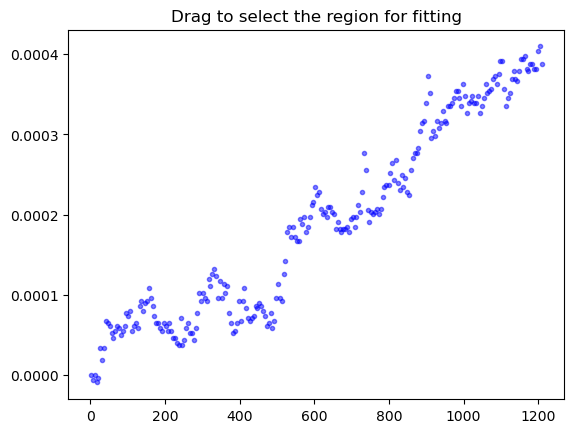

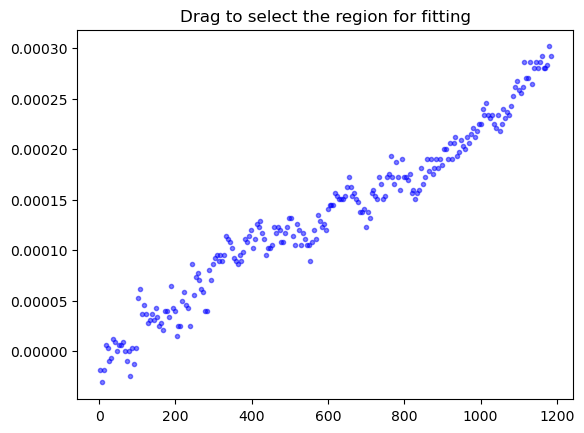

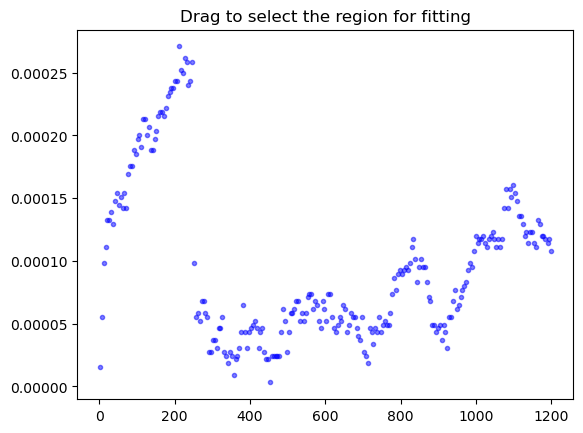

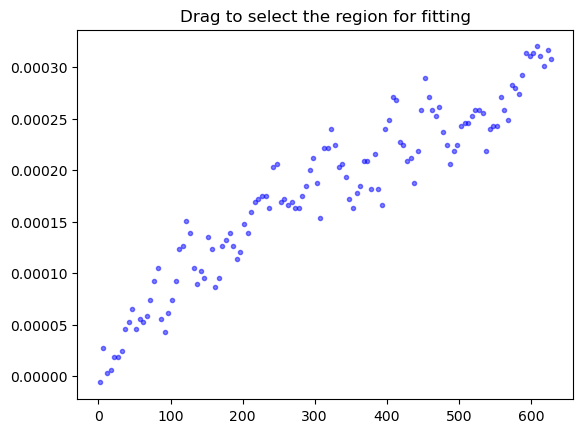

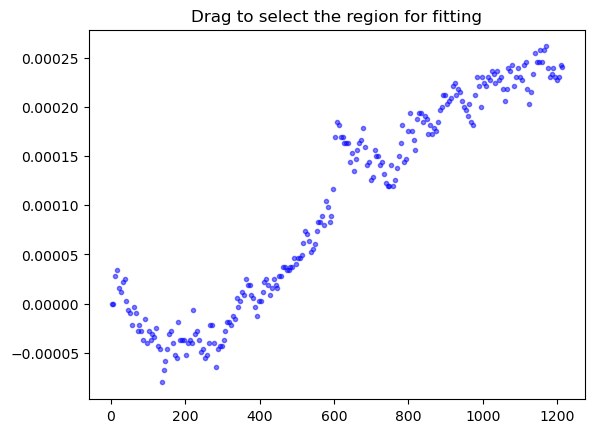

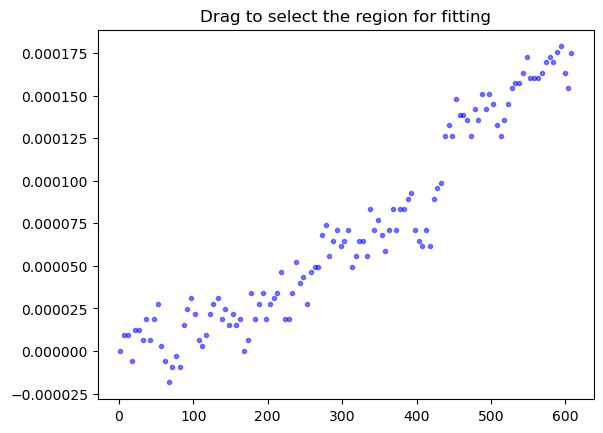

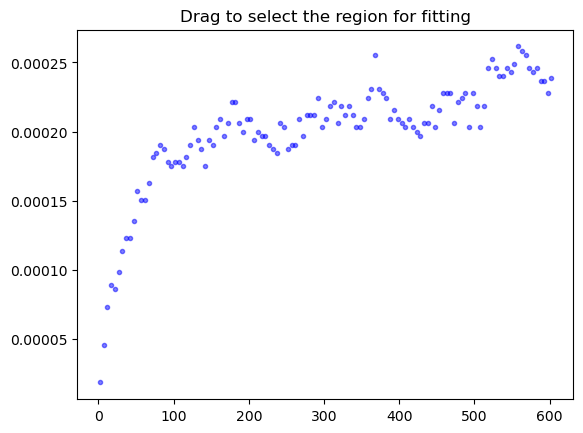

Identification complete.  Constructing database...
--- QCM_26-68deg_150V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_100V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_0V_no_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- Random QCM File Name.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_0V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_34V_300V_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
--- QCM_26-68deg_34V_no_suppression_bias.txt ---
Bayesian fit found.  Continuing...
RANSAC fit found.  Continuing...
-----
Saved QCM database to /Users/braden/Documents/ProbeTools/Testbed/QCM Database.csv
QCM database construction complete.
-----


,Filename,Slope,Lower ci,Upper ci,y_int,Rate,Lower Rate,Upper Rate,Start,End,RANSAC_m,RANSAC_b,RANSAC Rate
0,QCM_26-68deg_150V_300V_suppression_bias.txt,3.613436e-07,3.410740e-07,3.816381e-07,-0.000034,0.130084,0.122787,0.137390,0,242,3.278580e-07,-8.879341e-06,0.118029
1,QCM_26-68deg_100V_300V_suppression_bias.txt,2.205265e-07,2.133109e-07,2.277079e-07,0.000005,0.079390,0.076792,0.081975,0,237,2.228917e-07,3.290815e-06,0.080241
2,QCM_26-68deg_0V_no_suppression_bias.txt,1.051909e-07,9.357964e-08,1.170492e-07,-0.000006,0.037869,0.033689,0.042138,0,240,9.985098e-08,-1.523323e-07,0.035946
3,Random QCM File Name.txt,4.147381e-07,3.882659e-07,4.411082e-07,0.000048,0.149306,0.139776,0.158799,0,126,4.635072e-07,3.979320e-05,0.166863
4,QCM_26-68deg_0V_300V_suppression_bias.txt,3.249594e-07,3.112411e-07,3.384692e-07,-0.000109,0.116985,0.112047,0.121849,0,243,2.830042e-07,-7.258281e-05,0.101881
5,QCM_26-68deg_34V_300V_suppression_bias.txt,2.106657e-07,1.889174e-07,2.324572e-07,-0.000007,0.075840,0.068010,0.083685,0,122,3.187621e-07,-2.511295e-05,0.114754
6,QCM_26-68deg_34V_no_suppression_bias.txt,1.072985e-07,9.082002e-08,1.237687e-07,0.000176,0.038627,0.032695,0.044557,0,121,1.217771e-07,1.737526e-04,0.043840


In [2]:
dir_path = '/Users/braden/Documents/ProbeTools/Testbed'
process_directory(dir_path, inspect=True)

In [7]:
df = pd.read_csv(os.path.join(dir_path, 'QCM Database.csv'))
row = df[df['Filename'] == 'QCM_26-68deg_150V_300V_suppression_bias.txt']
row['Start'][0]
row['End'][0]

242